# Introduction

This project focuses on conducting Exploratory Data Analysis (EDA) on the Titanic dataset. The dataset contains various columns providing information about passengers aboard the RMS Titanic, such as their age, gender, socio-economic class, and survival status.

The EDA process will involve examining these columns individually and in relation to each other to understand the underlying patterns and relationships within the data. We will employ techniques like descriptive statistics, data visualization, and correlation analysis to gain insights into passenger demographics, survival rates, and potential factors influencing survival.

This exploration aims to uncover key features and trends in the data, which can then inform further analysis and predictive modeling tasks.

In [46]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [47]:
df = pd.read_csv('titanic.csv')

In [48]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [49]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [50]:
df.shape

(891, 12)

In [51]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: >

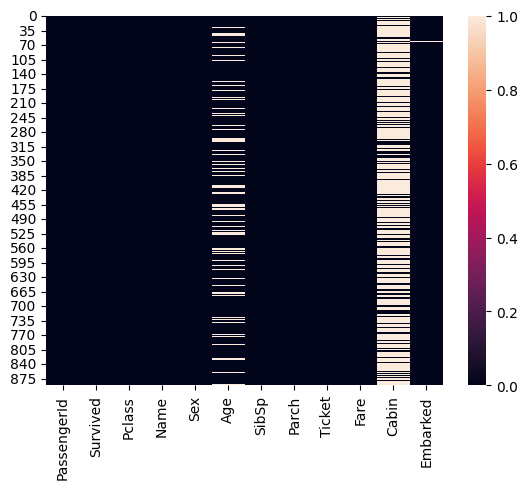

In [53]:
sns.heatmap(df.isnull())

In [54]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


# Data Cleaning and Preprocessing

In [55]:
df.Embarked.value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [56]:
# Replacing NaN values from Embarked to 'S'.
df['Embarked'].fillna('S', inplace=True)

<ipython-input-56-175149eac199>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna('S', inplace=True)


In [57]:
df.Cabin.value_counts()

,count
Cabin,
G6,4
C23 C25 C27,4
B96 B98,4
F2,3
D,3
...,...
E17,1
A24,1
C50,1


In [58]:
# To handle missing values in Cabin and Age column we will use K-Nearest Neighbors (KNN).
import sklearn as sk
from sklearn.impute import KNNImputer


In [59]:
# Creating an imputer object
imputer = KNNImputer(n_neighbors=5)

In [60]:
#imputing missing values of Age
imputed_age = imputer.fit_transform(df[['Age']])
df['Age'] = imputed_age

In [61]:
# Cabin needs to be preprocessed before imputation as it contains string values.
# Here's one approach - extracting the deck from the cabin number
df['Cabin'] = df['Cabin'].str.extract('([a-zA-Z]+)')  # Extract the first letter

# Now impute the deck using KNN, after converting it to numerical representation
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Cabin'] = le.fit_transform(df['Cabin'].astype(str))  # Encode deck to numbers
imputed_cabin = imputer.fit_transform(df[['Cabin']])
df['Cabin'] = imputed_cabin  # Update with imputed values


In [62]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


<Axes: >

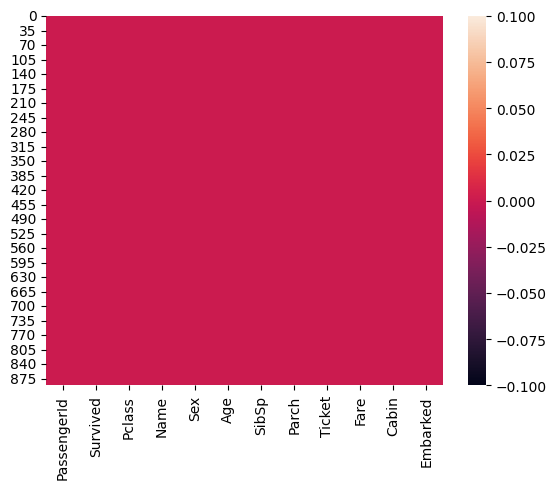

In [63]:
sns.heatmap(df.isnull())

In [64]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,8.0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,2.0,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,8.0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,2.0,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,8.0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,8.0,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,1.0,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,8.0,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,2.0,C


#Exploratory Data Analysis

In [65]:
# This dataset is categorical data so we use value_counts to describe data

In [66]:
# Discriptive Statistics.

In [67]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,6.716049
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,2.460739
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,8.000000
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,8.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,8.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,8.000000


In [68]:
# know the number of passengers per class.
df['Pclass'].value_counts()

,count
Pclass,
3,491
1,216
2,184


In [69]:
# knowing the number of servive passengers as per gender.
survived_by_gender =df.groupby('Sex')['Survived'].sum()
print(survived_by_gender)

Sex
female    233
male      109
Name: Survived, dtype: int64


<Axes: xlabel='Age', ylabel='Count'>

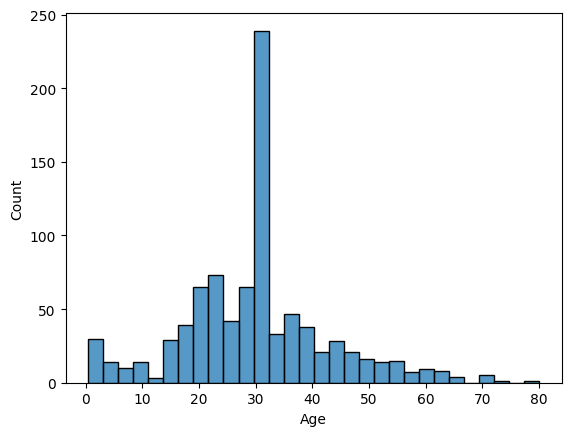

In [71]:
# Univariate Visualization
sns.histplot(df['Age'])

In [ ]:
# Maximun passengers age was 30 year old

<Axes: xlabel='Survived', ylabel='Age'>

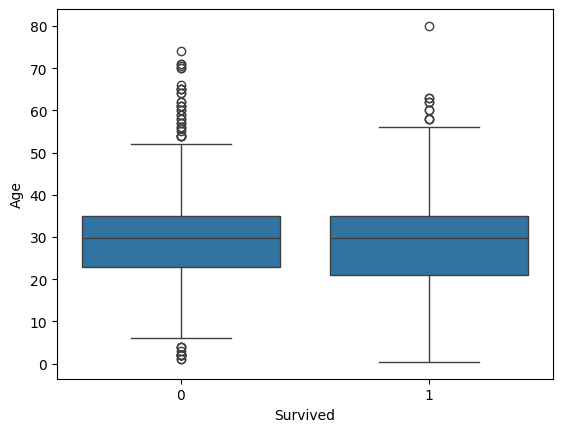

In [74]:
# knowing the ages of survived passesngers
sns.boxplot(x='Survived',y='Age',data=df)

In [75]:
#Bivariate Visualization

<Axes: xlabel='Pclass', ylabel='count'>

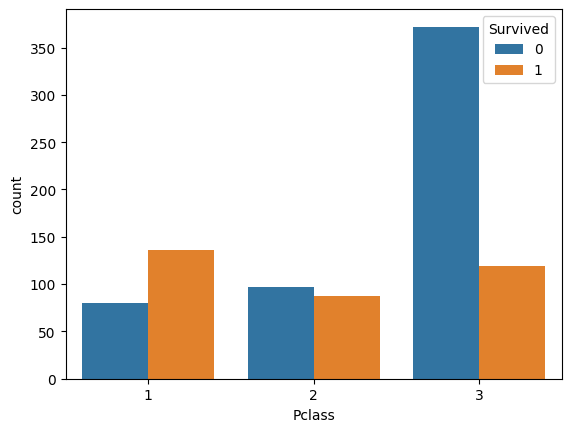

In [77]:
#knowing how mamy passesngers survives as per Passenger Class.
sns.countplot(x='Pclass',hue='Survived',data=df)

<Axes: xlabel='Age', ylabel='Fare'>

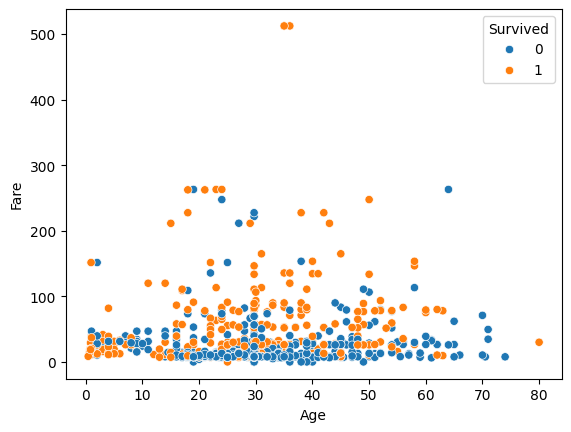

In [78]:
sns.scatterplot(x='Age',y='Fare',hue='Survived',data=df)

In [79]:
# Multivariate Visualization.

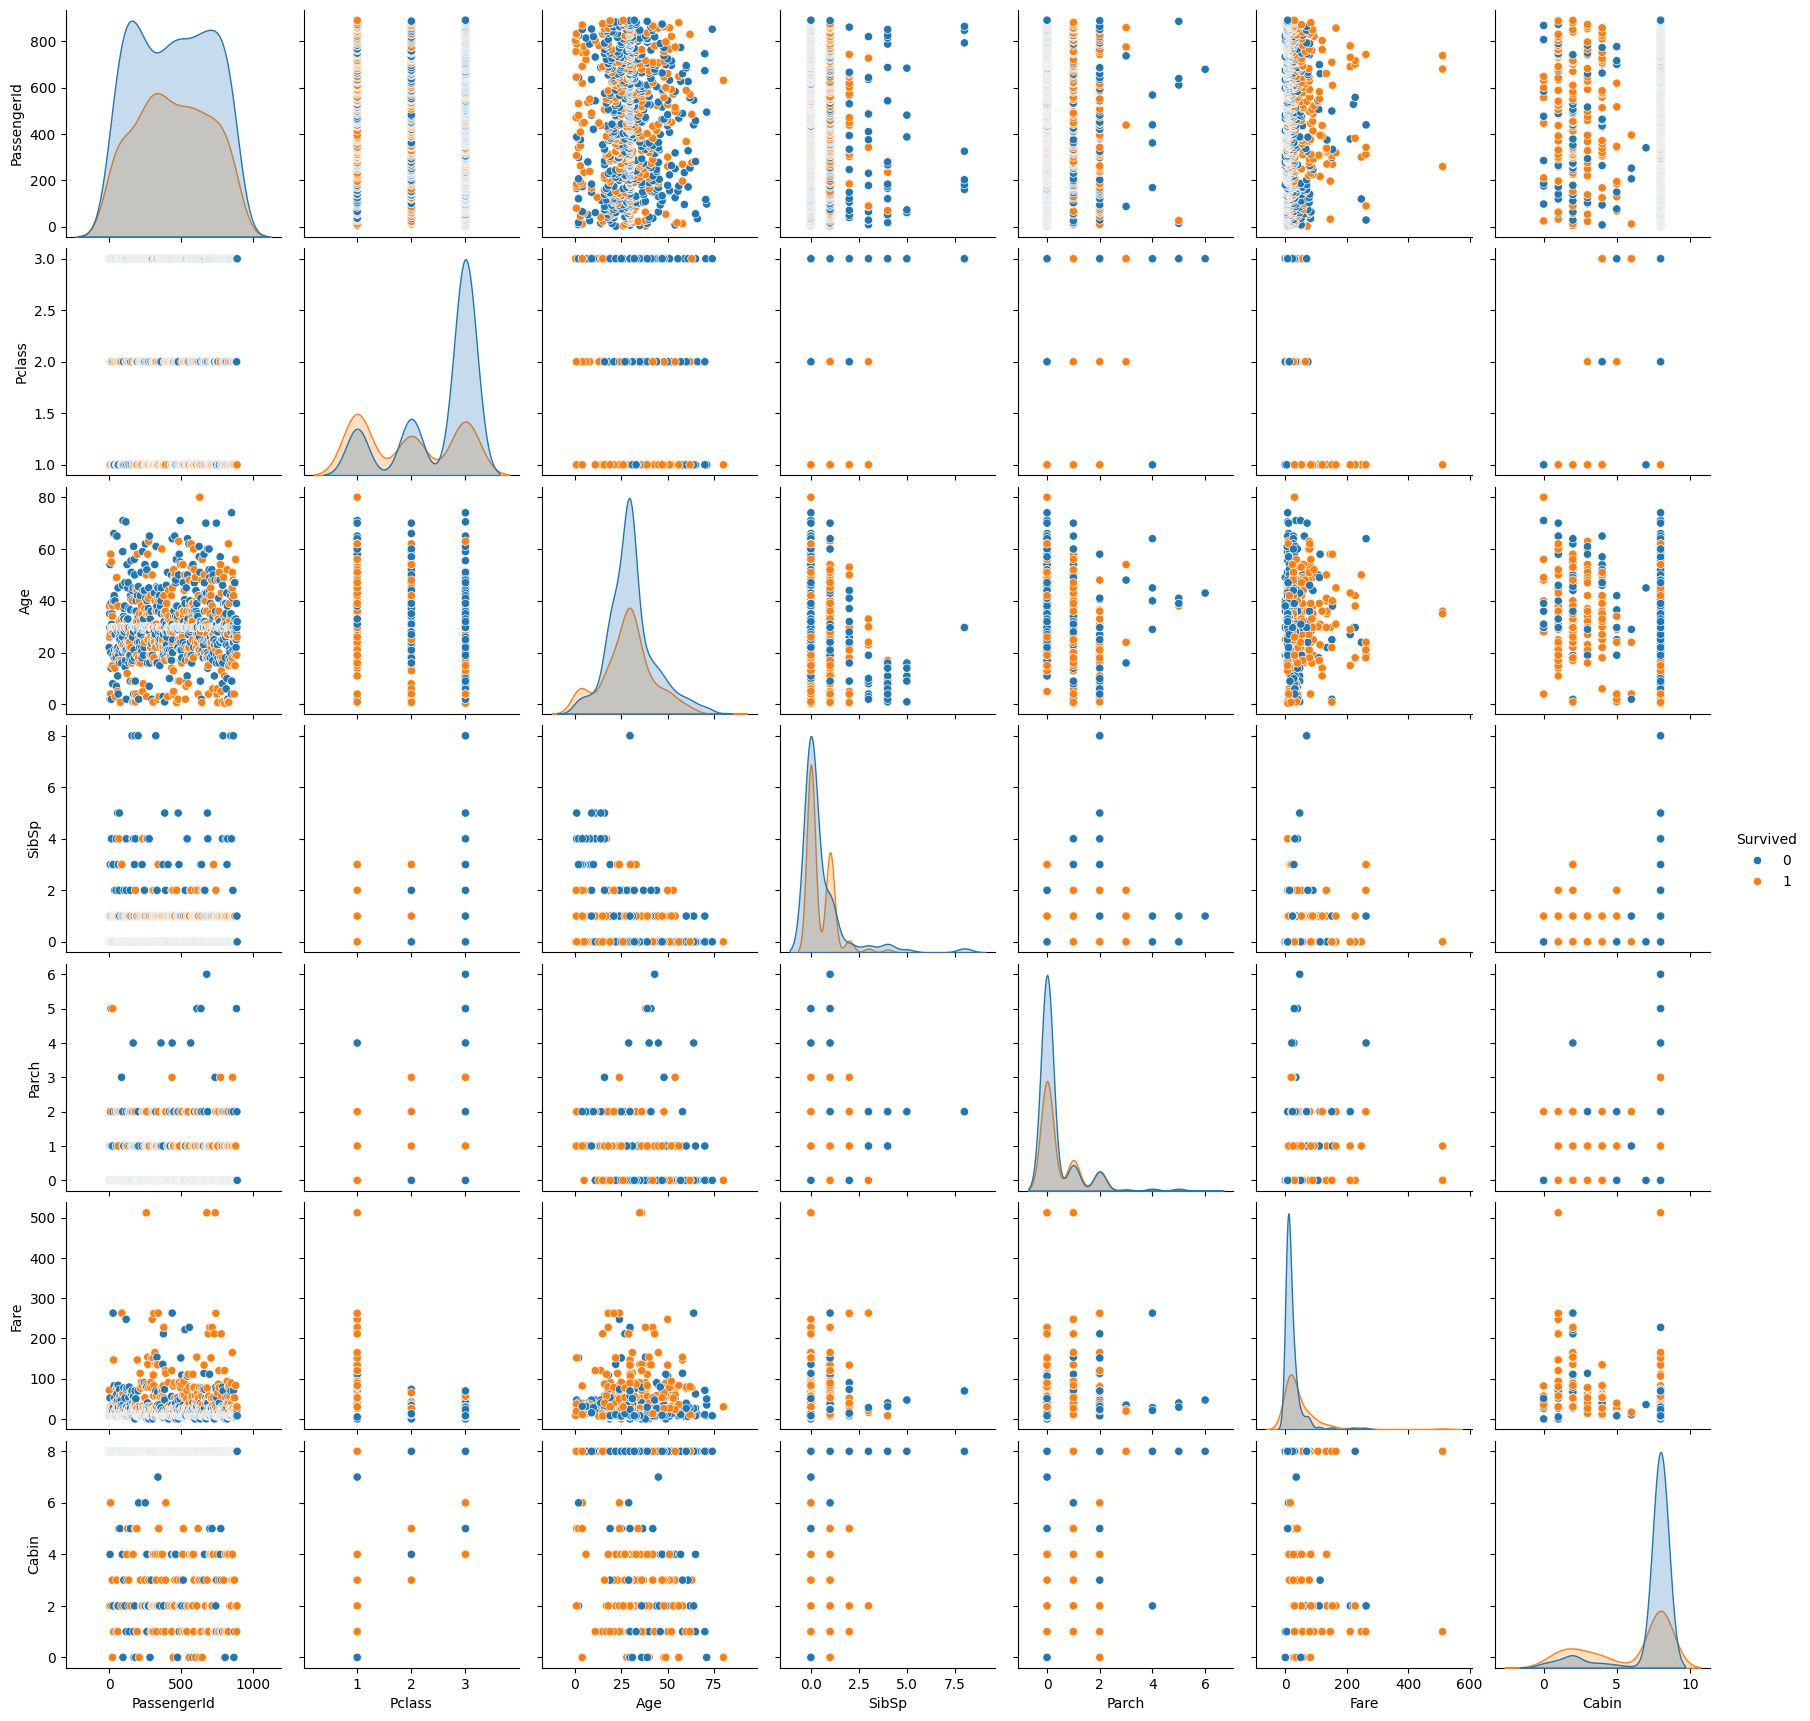

In [85]:
sns.pairplot(df, hue= 'Survived')

In [92]:
df_1 = df.dropna(subset=['Name'], inplace=True)

# Key Insights
1. Females had a significantly higher survival rate than males.
2. Passengers in higher classes (1st and 2nd) were more likely to survive.
3. Younger passengers, especially children, had a better chance of survival.
4. Traveling with family members offered a slight survival advantage, but large families had lower survival rates.
5. Embarkation port had a minor impact on survival, with Cherbourg passengers having a slightly higher rate.
6. Socio-economic status and gender played crucial roles in determining survival outcomes.
7. The overall survival rate was relatively low, highlighting the tragic nature of the event.

